In [1]:
import pyspark
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import StructType, StructField, StringType
from pyspark.sql.types import *
from pyspark.sql.functions import mean, min, max, lit, col, first, last, sum, count, countDistinct, desc

In [2]:
spark = SparkSession \
    .builder \
    .appName("Assignment") \
    .getOrCreate()

23/05/21 09:27:01 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
spark

In [4]:
# Define the schema for the demographic_distribution column
demographic_schema = ArrayType(
    StructType([
        StructField("age", StringType(), True),
        StructField("gender", StringType(), True),
        StructField("percentage", StringType(), True)
    ])
)

# Define the schema for the impressions column
impressions_schema = StructType([
        StructField("lower_bound", StringType(), True),
        StructField("upper_bound", StringType(), True),
])

# Define the schema for the region_distribution column
region_schema = ArrayType(
    StructType([
        StructField("percentage", StringType(), True),
        StructField("region", StringType(), True)
    ])
)

# Define the schema for the spend column
spend_schema = StructType([
    StructField("lower_bound", StringType(), True),
    StructField("upper_bound", StringType(), True)
])


# Define the schema for your json files
schema = StructType([
    StructField("ad_creation_time", StringType(), True),
    StructField("ad_creative_body", StringType(), True),
    StructField("ad_creative_link_caption", StringType(), True),
    StructField("ad_creative_link_description", StringType(), True),
    StructField("ad_creative_link_title", StringType(), True),
    StructField("ad_delivery_start_time", StringType(), True),
    StructField("ad_delivery_stop_time", StringType(), True),
    StructField("ad_snapshot_url", StringType(), True),
    StructField("currency", StringType(), True),
    StructField("demographic_distribution", demographic_schema, True),
    StructField("funding_entity", StringType(), True),
    StructField("id", StringType(), True),
    StructField("impressions", impressions_schema, True),
    StructField("page_id", StringType(), True),
    StructField("page_name", StringType(), True),
    StructField("region_distribution", region_schema, True),
    StructField("spend", spend_schema, True)
])

# Load JSON files using wildcard pattern
df = spark.read.option("header", True).schema(schema).json("/data/ProjectDatasetFacebook/FBads-US-*")
#df = spark.read.option("header",True).json("/data/ProjectDatasetFacebook/FBads-US-20201001-17_00_01")

23/05/21 09:27:27 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/21 09:27:42 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/05/21 09:27:57 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


In [ ]:
#df.printSchema()

In [5]:
pandas_df = df.limit(10).toPandas()
pandas_df

,ad_creation_time,ad_creative_body,ad_creative_link_caption,ad_creative_link_description,ad_creative_link_title,ad_delivery_start_time,ad_delivery_stop_time,ad_snapshot_url,currency,demographic_distribution,funding_entity,id,impressions,page_id,page_name,region_distribution,spend
0,2020-09-30,{{product.brand}},actionnetwork.org,{{product.description}},{{product.name}},2020-09-30,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(55-64, unknown, 0.0003), (18-24, female, 0.1...",Vote Yes for Fair Tax,334851157740086,"(10000, 14999)",190648437056,Vote Yes for Fair Tax,"[(1, Illinois)]","(200, 299)"
1,2020-09-23,Trump’s decision to end racial sensitivity tra...,bloomberg.com,The memo was released late Friday by Office of...,Trump Moves to End Federal Racial Sensitivity ...,2020-09-23,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(18-24, female, 0.235294), (25-34, female, 0....",ACRONYM,410318430378331,"(0, 999)",248833449184369,Boost the News,"[(1, Wisconsin)]","(0, 99)"
2,2020-09-23,"Trump is a ""climate arsonist"" and ""climate den...",theweek.com,"The fires raging in California, Oregon, and Wa...",Biden: Trump is a 'climate arsonist' who doesn...,2020-09-23,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(35-44, female, 0.06135), (35-44, male, 0.018...",ACRONYM,760713291157800,"(0, 999)",248833449184369,Boost the News,"[(1, Wisconsin)]","(0, 99)"
3,2020-09-23,The former vice president emphasized his commi...,nytimes.com,Two days after President Trump traveled to Wis...,"Biden says, ‘win or lose, I’m going to go down...",2020-09-23,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(18-24, male, 0.060932), (25-34, female, 0.54...",ACRONYM,780204089445065,"(0, 999)",248833449184369,Boost the News,"[(1, Wisconsin)]","(0, 99)"
4,2020-09-23,If Trump is able to replace Ginsburg with a st...,axios.com,John Roberts may not be able to save the heath...,A Trump Supreme Court pick would put the ACA i...,2020-09-23,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(35-44, unknown, 0.000601), (35-44, male, 0.0...",ACRONYM,1231266473897370,"(5000, 5999)",248833449184369,Boost the News,"[(1, Wisconsin)]","(100, 199)"
5,2020-09-23,"Biden joins his running mate, Sen. Kamala Harr...",jsonline.com,Biden's comments are in stark contrast to Dona...,Joe Biden says Kenosha police officer who shot...,2020-09-23,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(25-34, female, 0.651163), (18-24, female, 0....",ACRONYM,3789635211066136,"(0, 999)",248833449184369,Boost the News,"[(1, Wisconsin)]","(0, 99)"
6,2020-09-23,"Trump is a ""climate arsonist"" and ""climate den...",theweek.com,"The fires raging in California, Oregon, and Wa...",Biden: Trump is a 'climate arsonist' who doesn...,2020-09-23,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(18-24, unknown, 0.001548), (35-44, unknown, ...",ACRONYM,653784258879707,"(1000, 1999)",248833449184369,Boost the News,"[(1, Wisconsin)]","(0, 99)"
7,2020-09-23,The former vice president emphasized his commi...,nytimes.com,Two days after President Trump traveled to Wis...,"Biden says, ‘win or lose, I’m going to go down...",2020-09-23,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(18-24, male, 0.048632), (18-24, female, 0.33...",ACRONYM,706426256619411,"(0, 999)",248833449184369,Boost the News,"[(1, Wisconsin)]","(0, 99)"
8,2020-09-23,If Trump is able to replace Ginsburg with a st...,axios.com,John Roberts may not be able to save the heath...,A Trump Supreme Court pick would put the ACA i...,2020-09-23,None,https://www.facebook.com/ads/archive/render_ad...,USD,"[(18-24, unknown, 0.001057), (35-44, unknown, ...",ACRONYM,708863283309424,"(15000, 19999)",248833449184369,Boost the News,"[(1, Wisconsin)]","(200, 299)"
9,2020-09-23,"Biden joins his running mate, Sen. Kamala Harr...",jsonline.com,Biden's comments are in stark contrast to Dona...,Joe Biden says Kenosha police officer who shot...,2020-09-23,None,https://www.fac

In [ ]:
#df.select('ad_creative_body').take(4)[3][0]

In [ ]:
# print("Number of rows: ", df.count())
# print("Number of columns: ", len(df.columns))

In [6]:
poli_ag= df.filter(df.ad_creative_body.rlike('Republican|Democratic|Campaign|President|Election|Political|Trump|Biden|Election|Vote')|df.ad_creative_link_description.rlike('Republican|Democratic|Campaign|President|Election|Political|Trump|Biden|Election|Vote'))
poli_ag_unique = poli_ag.dropDuplicates(['id'])

In [ ]:
#poli_ag_unique.limit(10).toPandas()

In [ ]:
#poli_ag.select('ad_creative_body').take(30)[29][0]

In [7]:
#Print the dimensions of df
print("Number of rows: ", poli_ag_unique.count())
print("Number of columns: ", len(poli_ag.columns))

Number of rows:  1572303
Number of columns:  17


In [8]:
rep_ag_fil1= poli_ag_unique.filter(poli_ag_unique.funding_entity.rlike('NRSC|Trump|Knopp')|poli_ag_unique.ad_creative_body.rlike('Republican|Donald|Trump')|poli_ag_unique.ad_creative_link_description.rlike('Trump|Republican|Donald')|poli_ag_unique.ad_creative_link_caption.rlike('winred.com|trump'))
rep_ag= rep_ag_fil1.filter((~rep_ag_fil1["funding_entity"].rlike('DCCC|Alexandria|Jessica|ACRONYM|Biden|Harris')) & (~rep_ag_fil1["ad_creative_link_caption"].rlike('blue')) & (~rep_ag_fil1["page_name"].rlike('MoveOn'))) 
#rep_ag.limit(10).toPandas()

In [ ]:
#rep_ag.select('ad_creative_body').take(20)[19][0]

In [9]:
print("Number of rows: ", rep_ag.count())
print("Number of columns: ", len(rep_ag.columns))

Number of rows:  805312
Number of columns:  17


In [10]:
dem_ag= poli_ag_unique.subtract(rep_ag)
#dem_ag.limit(20).toPandas()

In [ ]:
#dem_ag.select('ad_creative_body').take(10)[9]

In [11]:
print("Number of rows: ", dem_ag.count())
print("Number of columns: ", len(dem_ag.columns))

Number of rows:  766991
Number of columns:  17


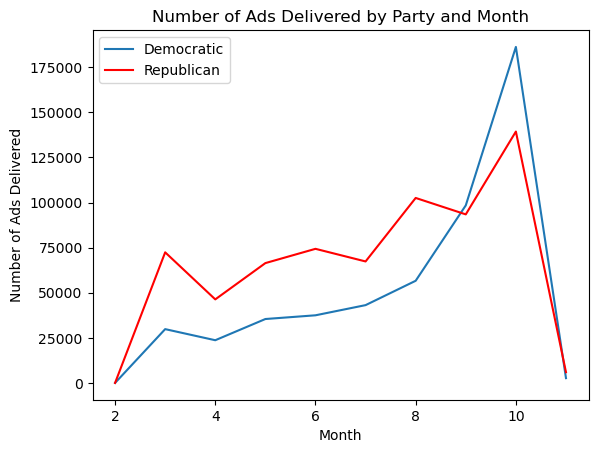

In [12]:
#Analysis:

#Plot of volume of rep_ag over time Vs volume of dem_ag over time

import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Create a list of all the months in the year
all_months = list(range(2, 12))

# Filter the data to only include ads generated in 2020-2021
dem_ag_fil1 = dem_ag.filter((F.col('ad_delivery_start_time') >= '2020-03-01') & (F.col('ad_delivery_start_time') <= '2020-11-04'))
rep_ag_fil1 = rep_ag.filter((F.col('ad_delivery_start_time') >= '2020-03-01') & (F.col('ad_delivery_start_time') <= '2020-11-04'))

# Group the filtered data by year and month and count the number of ads delivered for each group
dem_ag_grouped = dem_ag_fil1.groupBy(F.year('ad_delivery_start_time').alias('year'),
                                     F.month('ad_delivery_start_time').alias('month')) \
                             .count() \
                             .orderBy('year', 'month')

rep_ag_grouped = rep_ag_fil1.groupBy(F.year('ad_delivery_start_time').alias('year'),
                                     F.month('ad_delivery_start_time').alias('month')) \
                             .count() \
                             .orderBy('year', 'month')

# Extract the year, month, and count values as lists
dem_ag_years = dem_ag_grouped.select('year').rdd.flatMap(lambda x: x).collect()
dem_ag_months = dem_ag_grouped.select('month').rdd.flatMap(lambda x: x).collect()
dem_ag_counts = dem_ag_grouped.select('count').rdd.flatMap(lambda x: x).collect()

rep_ag_years = rep_ag_grouped.select('year').rdd.flatMap(lambda x: x).collect()
rep_ag_months = rep_ag_grouped.select('month').rdd.flatMap(lambda x: x).collect()
rep_ag_counts = rep_ag_grouped.select('count').rdd.flatMap(lambda x: x).collect()

# Combine the available data with the missing months
combined_months = []
combined_dem_ag_counts = []
combined_rep_ag_counts = []
for month in all_months:
    if month in dem_ag_months:
        dem_ag_idx = dem_ag_months.index(month)
        combined_dem_ag_counts.append(dem_ag_counts[dem_ag_idx])
    else:
        combined_dem_ag_counts.append(0)
    if month in rep_ag_months:
        rep_ag_idx = rep_ag_months.index(month)
        combined_rep_ag_counts.append(rep_ag_counts[rep_ag_idx])
    else:
        combined_rep_ag_counts.append(0)
    combined_months.append(month)

# Create a line plot of the number of ads delivered over the months in 2020-2021
plt.plot(combined_months, combined_dem_ag_counts, label='Democratic')
plt.plot(combined_months, combined_rep_ag_counts, color= 'red', label='Republican')

# Add labels to the plot
plt.xlabel('Month')
plt.ylabel('Number of Ads Delivered')
plt.title('Number of Ads Delivered by Party and Month')
plt.legend()

# Show the plot
plt.show()

In [14]:
# Import required functions
import pyspark.sql.functions as F

# Flatten the list of tuples into separate rows
dem_flat_df = dem_ag.select(F.explode('region_distribution').alias('region'))
rep_flat_df = rep_ag.select(F.explode('region_distribution').alias('region'))

dem_state_counts = dem_flat_df.select(F.col('region').getItem('region').alias('state')).groupBy('state').count()
rep_state_counts = rep_flat_df.select(F.col('region').getItem('region').alias('state')).groupBy('state').count()

# Convert the resulting dataframe to a dictionary
# dem_state_counts_dict = dem_state_counts.rdd.collectAsMap()
# rep_state_counts_dict = rep_state_counts.rdd.collectAsMap()


# Define a list of US states
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
             'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
             'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
             'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
             'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
             'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
             'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

# Filter out the US states from dem_state_counts DataFrame
filtered_dem_state_counts = dem_state_counts.filter(F.col('state').isin(us_states))
filtered_rep_state_counts = rep_state_counts.filter(F.col('state').isin(us_states))

# # Show the filtered DataFrame
# filtered_dem_state_counts.show()
# filtered_rep_state_counts.show()

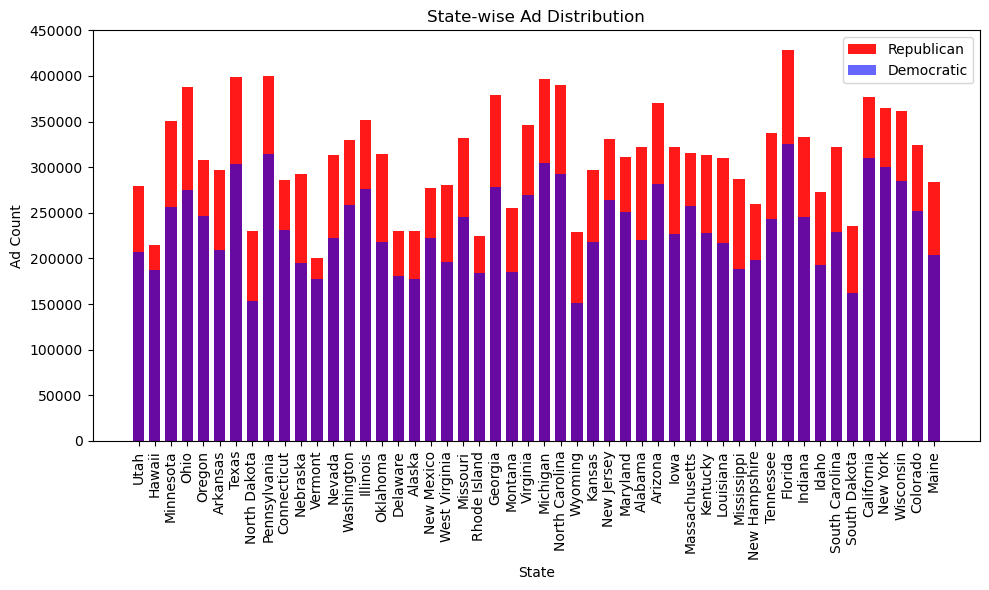

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F


# Convert the ad_counts_df DataFrame to a Pandas DataFrame
dem_pandas_df = filtered_dem_state_counts.toPandas()
rep_pandas_df = filtered_rep_state_counts.toPandas()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6)) 

bar_width = 0.7

# Plot the Democratic state counts
ax.bar(rep_pandas_df['state'], rep_pandas_df['count'], color='red', width=bar_width, alpha=0.9, label='Republican')

# Plot the Republican state counts
ax.bar(dem_pandas_df['state'], dem_pandas_df['count'], color='blue', width=bar_width, alpha=0.6, label='Democratic')

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Ad Count')
ax.set_title('State-wise Ad Distribution')

#plt.subplots_adjust(bottom=0.80)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add legend
ax.legend()
ax.set_ylim(0, 450000) 

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [16]:
elect_stats_df= pd.read_csv('/var/www/notebooks/Popular_vote_backend.csv')
indexes_to_remove = [0,1,2,3,19,8,36,11,43,44]

# Drop rows based on indexes
elect_stats_fil= elect_stats_df.drop(indexes_to_remove)
elect_stats_fil

# Remove commas from the string column
elect_stats_fil['dem_votes']= elect_stats_fil['dem_votes'].str.replace(',', '')
elect_stats_fil['rep_votes']= elect_stats_fil['rep_votes'].str.replace(',', '')
elect_stats_fil['other_votes']= elect_stats_fil['other_votes'].str.replace(',', '')
elect_stats_fil['dem_votes']= pd.to_numeric(elect_stats_fil['dem_votes'])
elect_stats_fil['rep_votes']= pd.to_numeric(elect_stats_fil['rep_votes'])
elect_stats_fil['other_votes']= pd.to_numeric(elect_stats_fil['other_votes'])

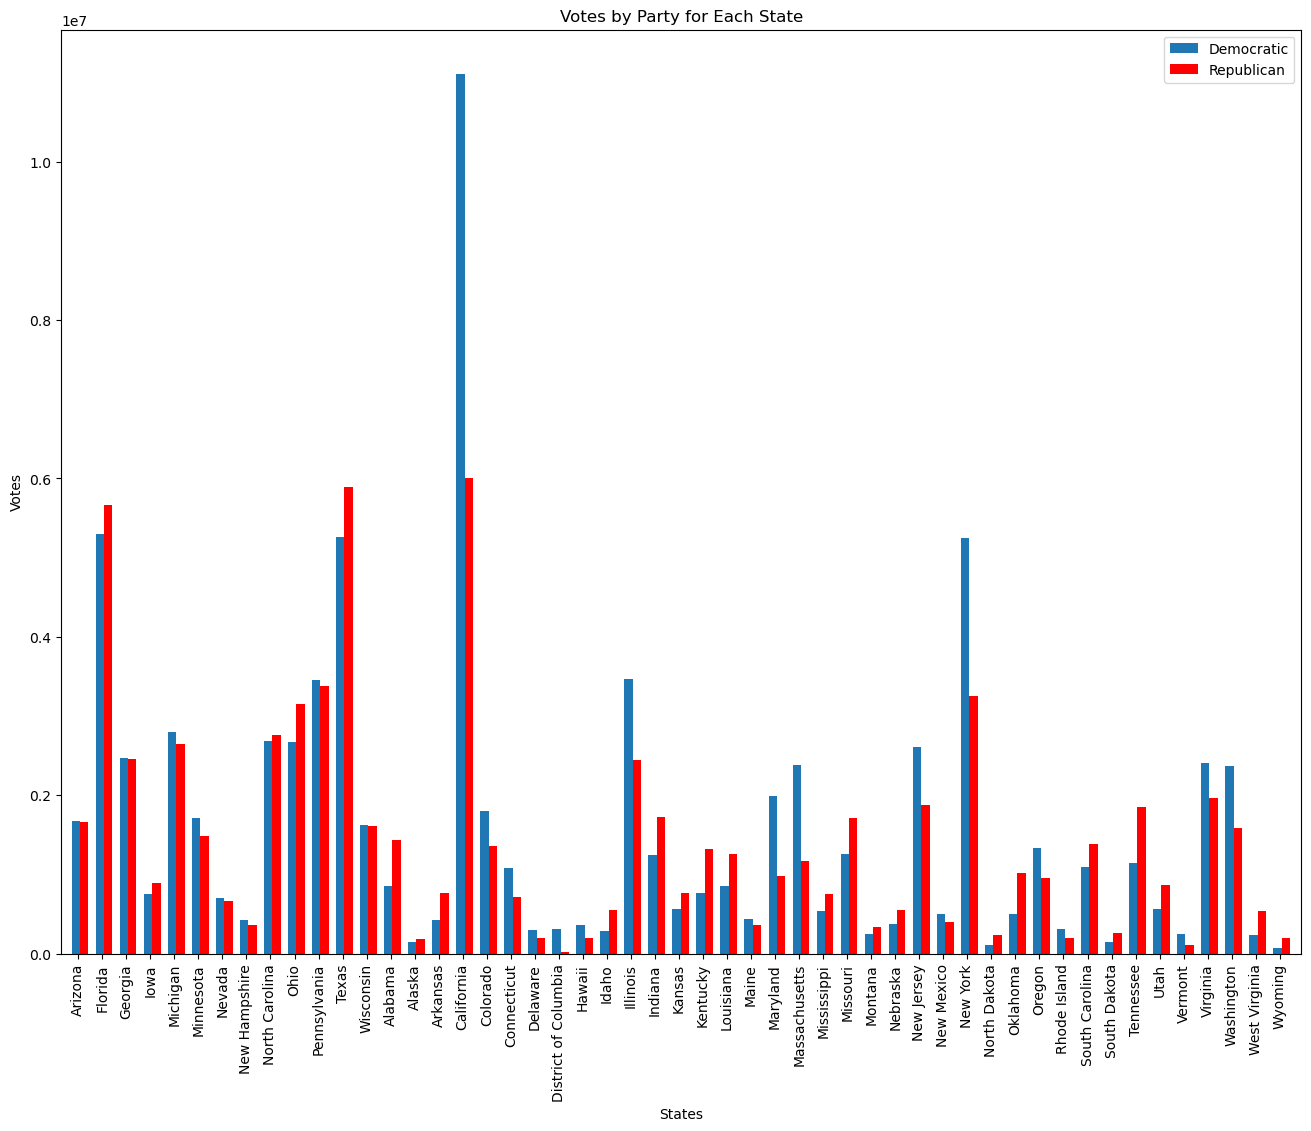

In [17]:
import numpy as np

states =elect_stats_fil['state']
dem_votes = elect_stats_fil['dem_votes']
rep_votes = elect_stats_fil['rep_votes']

plt.figure(figsize=(16, 12))
bar_width= 0.35
index = np.arange(len(states))

# Plot the bars for Democratic votes
plt.bar(index-0.1, dem_votes, bar_width, label='Democratic')

# Plot the bars for Republican votes
plt.bar(index + 0.25, rep_votes, bar_width, color='red', label='Republican')

#Customize the x-axis labels
plt.xticks(index, states)
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('States')
plt.ylabel('Votes')
plt.title('Votes by Party for Each State')
plt.legend()

plt.xlim(-0.7, len(states)-0.1)

# Display the plot
plt.show()


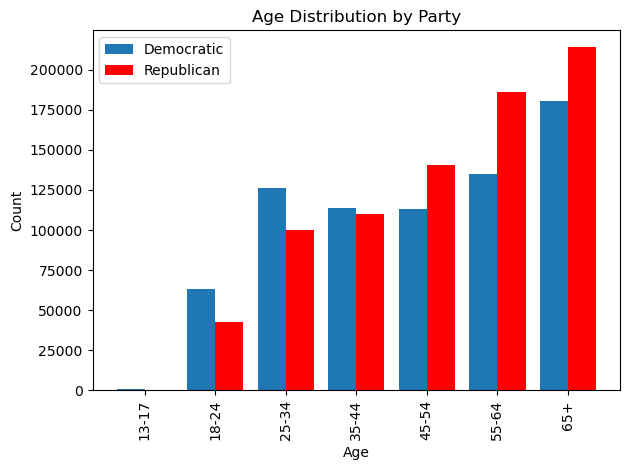

23/05/13 06:10:41 ERROR TransportClient: Failed to send RPC RPC 4992040293721039415 to /100.64.74.195:42230: io.netty.channel.StacklessClosedChannelException
io.netty.channel.StacklessClosedChannelException
	at io.netty.channel.AbstractChannel$AbstractUnsafe.write(Object, ChannelPromise)(Unknown Source)
23/05/13 06:10:41 ERROR TransportClient: Failed to send RPC RPC 5220155129349766370 to /100.64.74.195:39822: io.netty.channel.StacklessClosedChannelException
io.netty.channel.StacklessClosedChannelException
	at io.netty.channel.AbstractChannel$AbstractUnsafe.write(Object, ChannelPromise)(Unknown Source)
23/05/13 06:10:41 ERROR TransportClient: Failed to send RPC RPC 5811149761773373685 to /100.64.74.130:35718: io.netty.channel.StacklessClosedChannelException
io.netty.channel.StacklessClosedChannelException
	at io.netty.channel.AbstractChannel$AbstractUnsafe.write(Object, ChannelPromise)(Unknown Source)
23/05/13 06:10:41 ERROR TransportClient: Failed to send RPC RPC 7716794034446362492 t

In [18]:
#Analysis 3:
#effectiveness of democratic ads is better? Or republican ads actually do more damage than help?
#Hypo: Is the the age demograhic targetted by the dem was more appropriate (more people from the targetted age group voted)
dem_exploded_df = dem_ag.select(F.explode('demographic_distribution').alias('demographic'))
rep_exploded_df = rep_ag.select(F.explode('demographic_distribution').alias('demographic'))

# Extract the age values from the exploded column
dem_age_df = dem_exploded_df.select(F.col('demographic').getItem('age').alias('age'), F.col('demographic').getItem('percentage').cast('float').alias('percentage')
)
rep_age_df = rep_exploded_df.select(F.col('demographic').getItem('age').alias('age'), F.col('demographic').getItem('percentage').cast('float').alias('percentage')
)

# Calculate the weighted age counts
dem_age_counts = dem_age_df.groupBy('age').agg(F.sum('percentage').alias('weighted_count')).orderBy('age')
rep_age_counts = rep_age_df.groupBy('age').agg(F.sum('percentage').alias('weighted_count')).orderBy('age')

# Filter out the "Unknown" category
dem_age_counts_filtered = dem_age_counts.filter(dem_age_counts['age'] != 'Unknown')
rep_age_counts_filtered = rep_age_counts.filter(rep_age_counts['age'] != 'Unknown')

# Convert the resulting DataFrame to Pandas for plotting
dem_age_counts_pd = dem_age_counts_filtered.toPandas()
rep_age_counts_pd = rep_age_counts_filtered.toPandas()

# Set the width of the bars
bar_width = 0.4

# Create an array of x positions for the bars
x = np.arange(len(dem_age_counts_pd['age']))
0
# Plot the age distribution for Democratic party
plt.bar(x, dem_age_counts_pd['weighted_count'], width=bar_width, label='Democratic')

# Shift the x positions for the bars of Republican party
plt.bar(x + bar_width, rep_age_counts_pd['weighted_count'], color='red', width=bar_width, label='Republican')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Party')
plt.legend()  # Show legend for party labels
plt.xticks(x + bar_width / 2, dem_age_counts_pd['age'], rotation=90)  # Set x-axis labels and rotation
plt.tight_layout()  # Adjust the spacing between the plot elements
plt.show()

In [19]:
voter_demo_df= pd.read_csv('/var/www/notebooks/voter_demographic.csv')
rows_to_remove = [0,1,2,3,4,5,6]
voter_demo_df= voter_demo_df.drop(rows_to_remove)
columns_to_remove = [2,3,5,6,7,8,10,11,12,13]  # Index of columns to remove
filtered_voter_demo = voter_demo_df.drop(voter_demo_df.columns[columns_to_remove], axis=1)
filtered_voter_demo["STATE"].fillna(method="ffill", inplace=True)

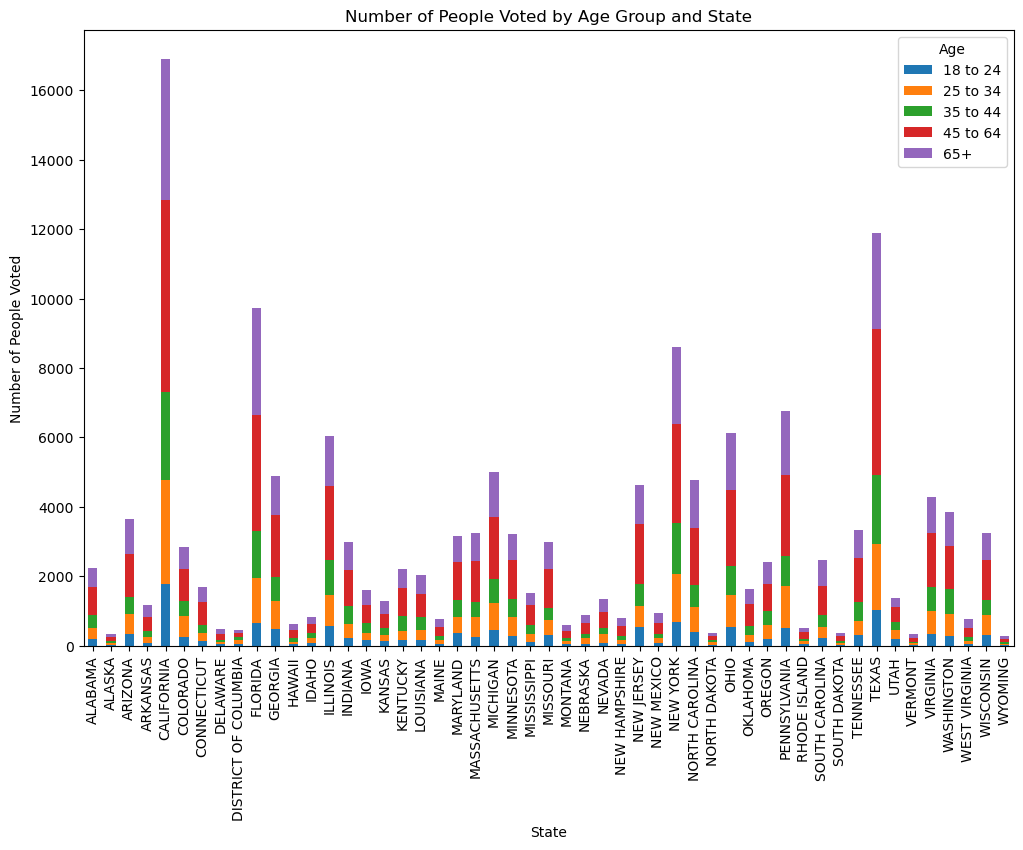

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to exclude rows calculating the total voters
filtered_voter_df = filtered_voter_demo[filtered_voter_demo["Age"] != "Total"].copy()

# Remove commas and convert the "Voted" column to numeric
filtered_voter_df.loc[:, "Voted"] = filtered_voter_df["Voted"].str.replace(",", "").astype(int)

# Pivot the DataFrame to create separate columns for each age group within each state
pivot_df = filtered_voter_df.pivot(index="STATE", columns="Age", values="Voted")

# Plotting the stacked bar chart
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(12, 8))

# Set the labels and title
ax.set_xlabel("State")
ax.set_ylabel("Number of People Voted")
ax.set_title("Number of People Voted by Age Group and State")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()


In [21]:
# Stop SparkSession
spark.stop()